<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Car price prediction
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


In [1]:
import warnings
warnings.filterwarnings("ignore")

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Load the dataset</div>l

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('car data.csv')

# Display the first few rows of the dataset
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
# Check for missing values
print(data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [10]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Display the updated dataset
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  2011           2.85           4.15        5200      0   
4    swift  2014           4.60           6.87       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0                 0                 1                        0   
1                 1                 0                        0   
2                 0                 1                        0   
3                 0                 1                        0   
4                 1                 0                        0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> EDA </div>l

In [14]:
# Correlation matrix
correlation_matrix = data.corr()
data.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058,0.473390,-0.465326,-0.512121,-0.348776
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.064315,0.552339,0.473390,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465326,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Selling_type_Individual,-0.039896,-0.550724,-0.512121,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348776,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


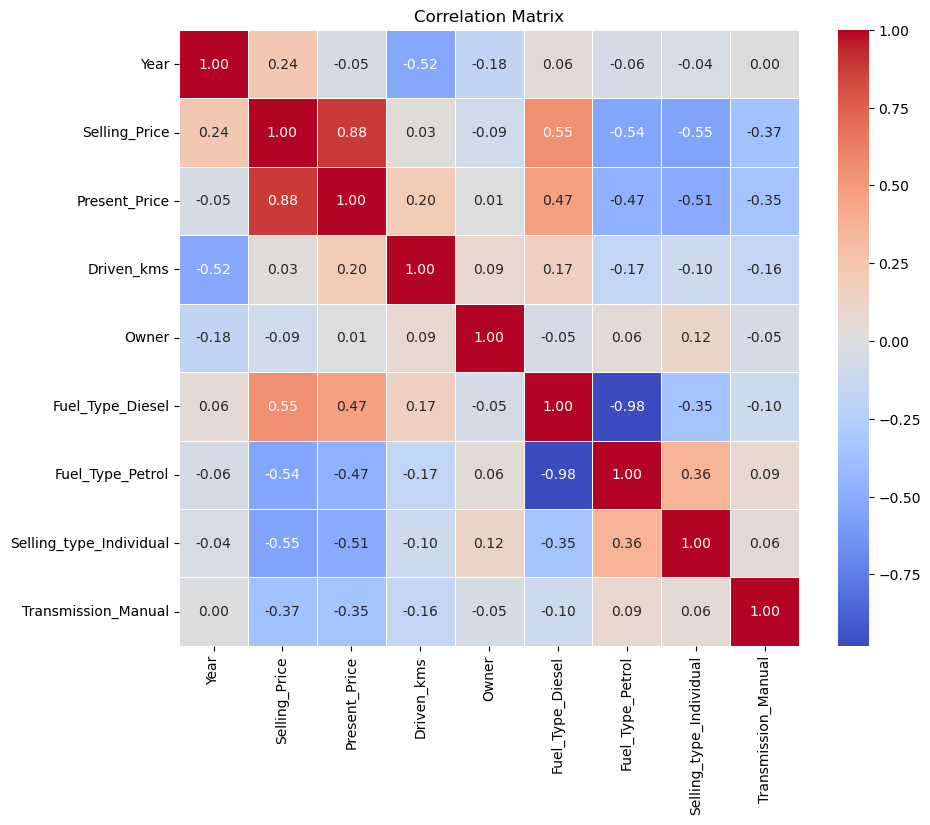

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


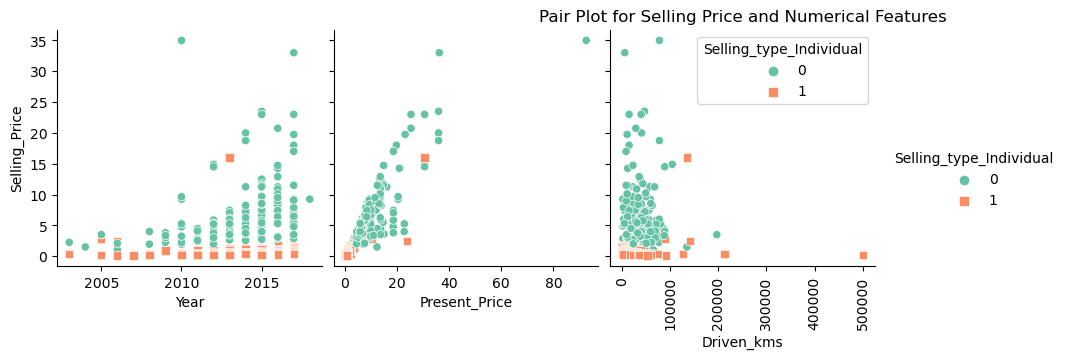

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting categorical columns for color variations
categorical_cols = ['Selling_type_Individual', 'Transmission_Manual']

# Add hue for categorical features, rotate x-axis labels, and set different colors
sns.pairplot(data, x_vars=['Year', 'Present_Price', 'Driven_kms'], y_vars='Selling_Price',
             hue=categorical_cols[0], palette='Set2', height=3, aspect=1, markers=["o", "s"])

# Customize the plot
plt.title('Pair Plot for Selling Price and Numerical Features')
plt.xticks(rotation=90)
plt.legend(title=categorical_cols[0], loc='upper right')

# Show the plot
plt.show()


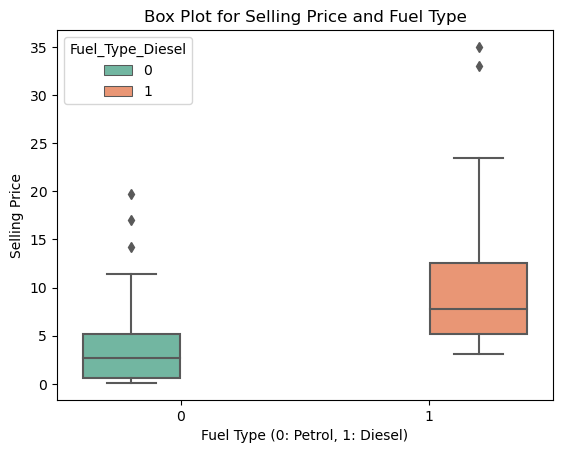

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set custom palette for better color differentiation
custom_palette = sns.color_palette("Set2")

# Box plot with 'Fuel_Type' effect
sns.boxplot(x='Fuel_Type_Diesel', y='Selling_Price', data=data, hue='Fuel_Type_Diesel', palette=custom_palette)
plt.title('Box Plot for Selling Price and Fuel Type')
plt.xlabel('Fuel Type (0: Petrol, 1: Diesel)')
plt.ylabel('Selling Price')
plt.show()


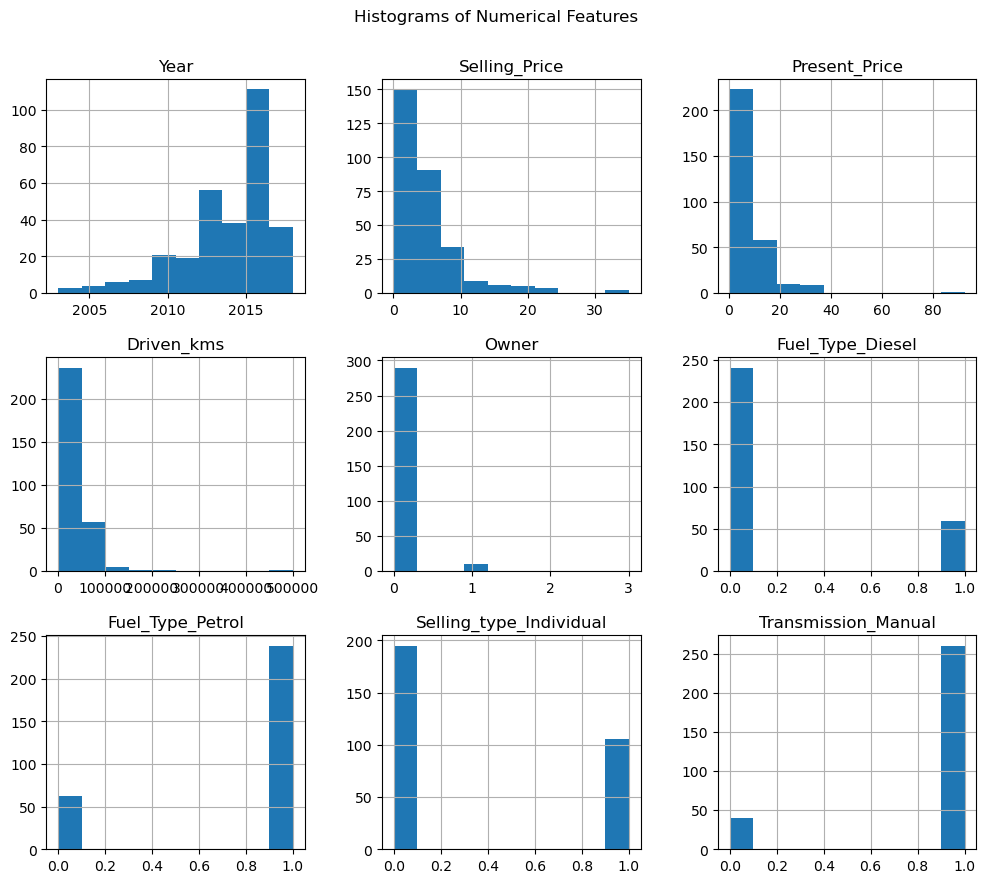

In [30]:
# Histograms for numerical features
data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', y=0.95)
plt.show()


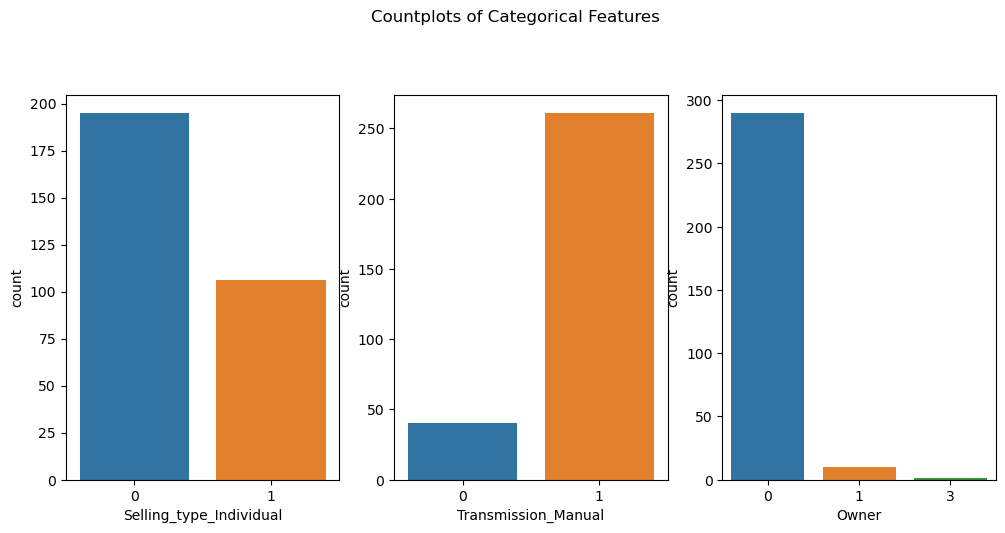

In [31]:
# Countplots for categorical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Selling_type_Individual', data=data)
plt.subplot(1, 3, 2)
sns.countplot(x='Transmission_Manual', data=data)
plt.subplot(1, 3, 3)
sns.countplot(x='Owner', data=data)
plt.suptitle('Countplots of Categorical Features', y=1.05)
plt.show()


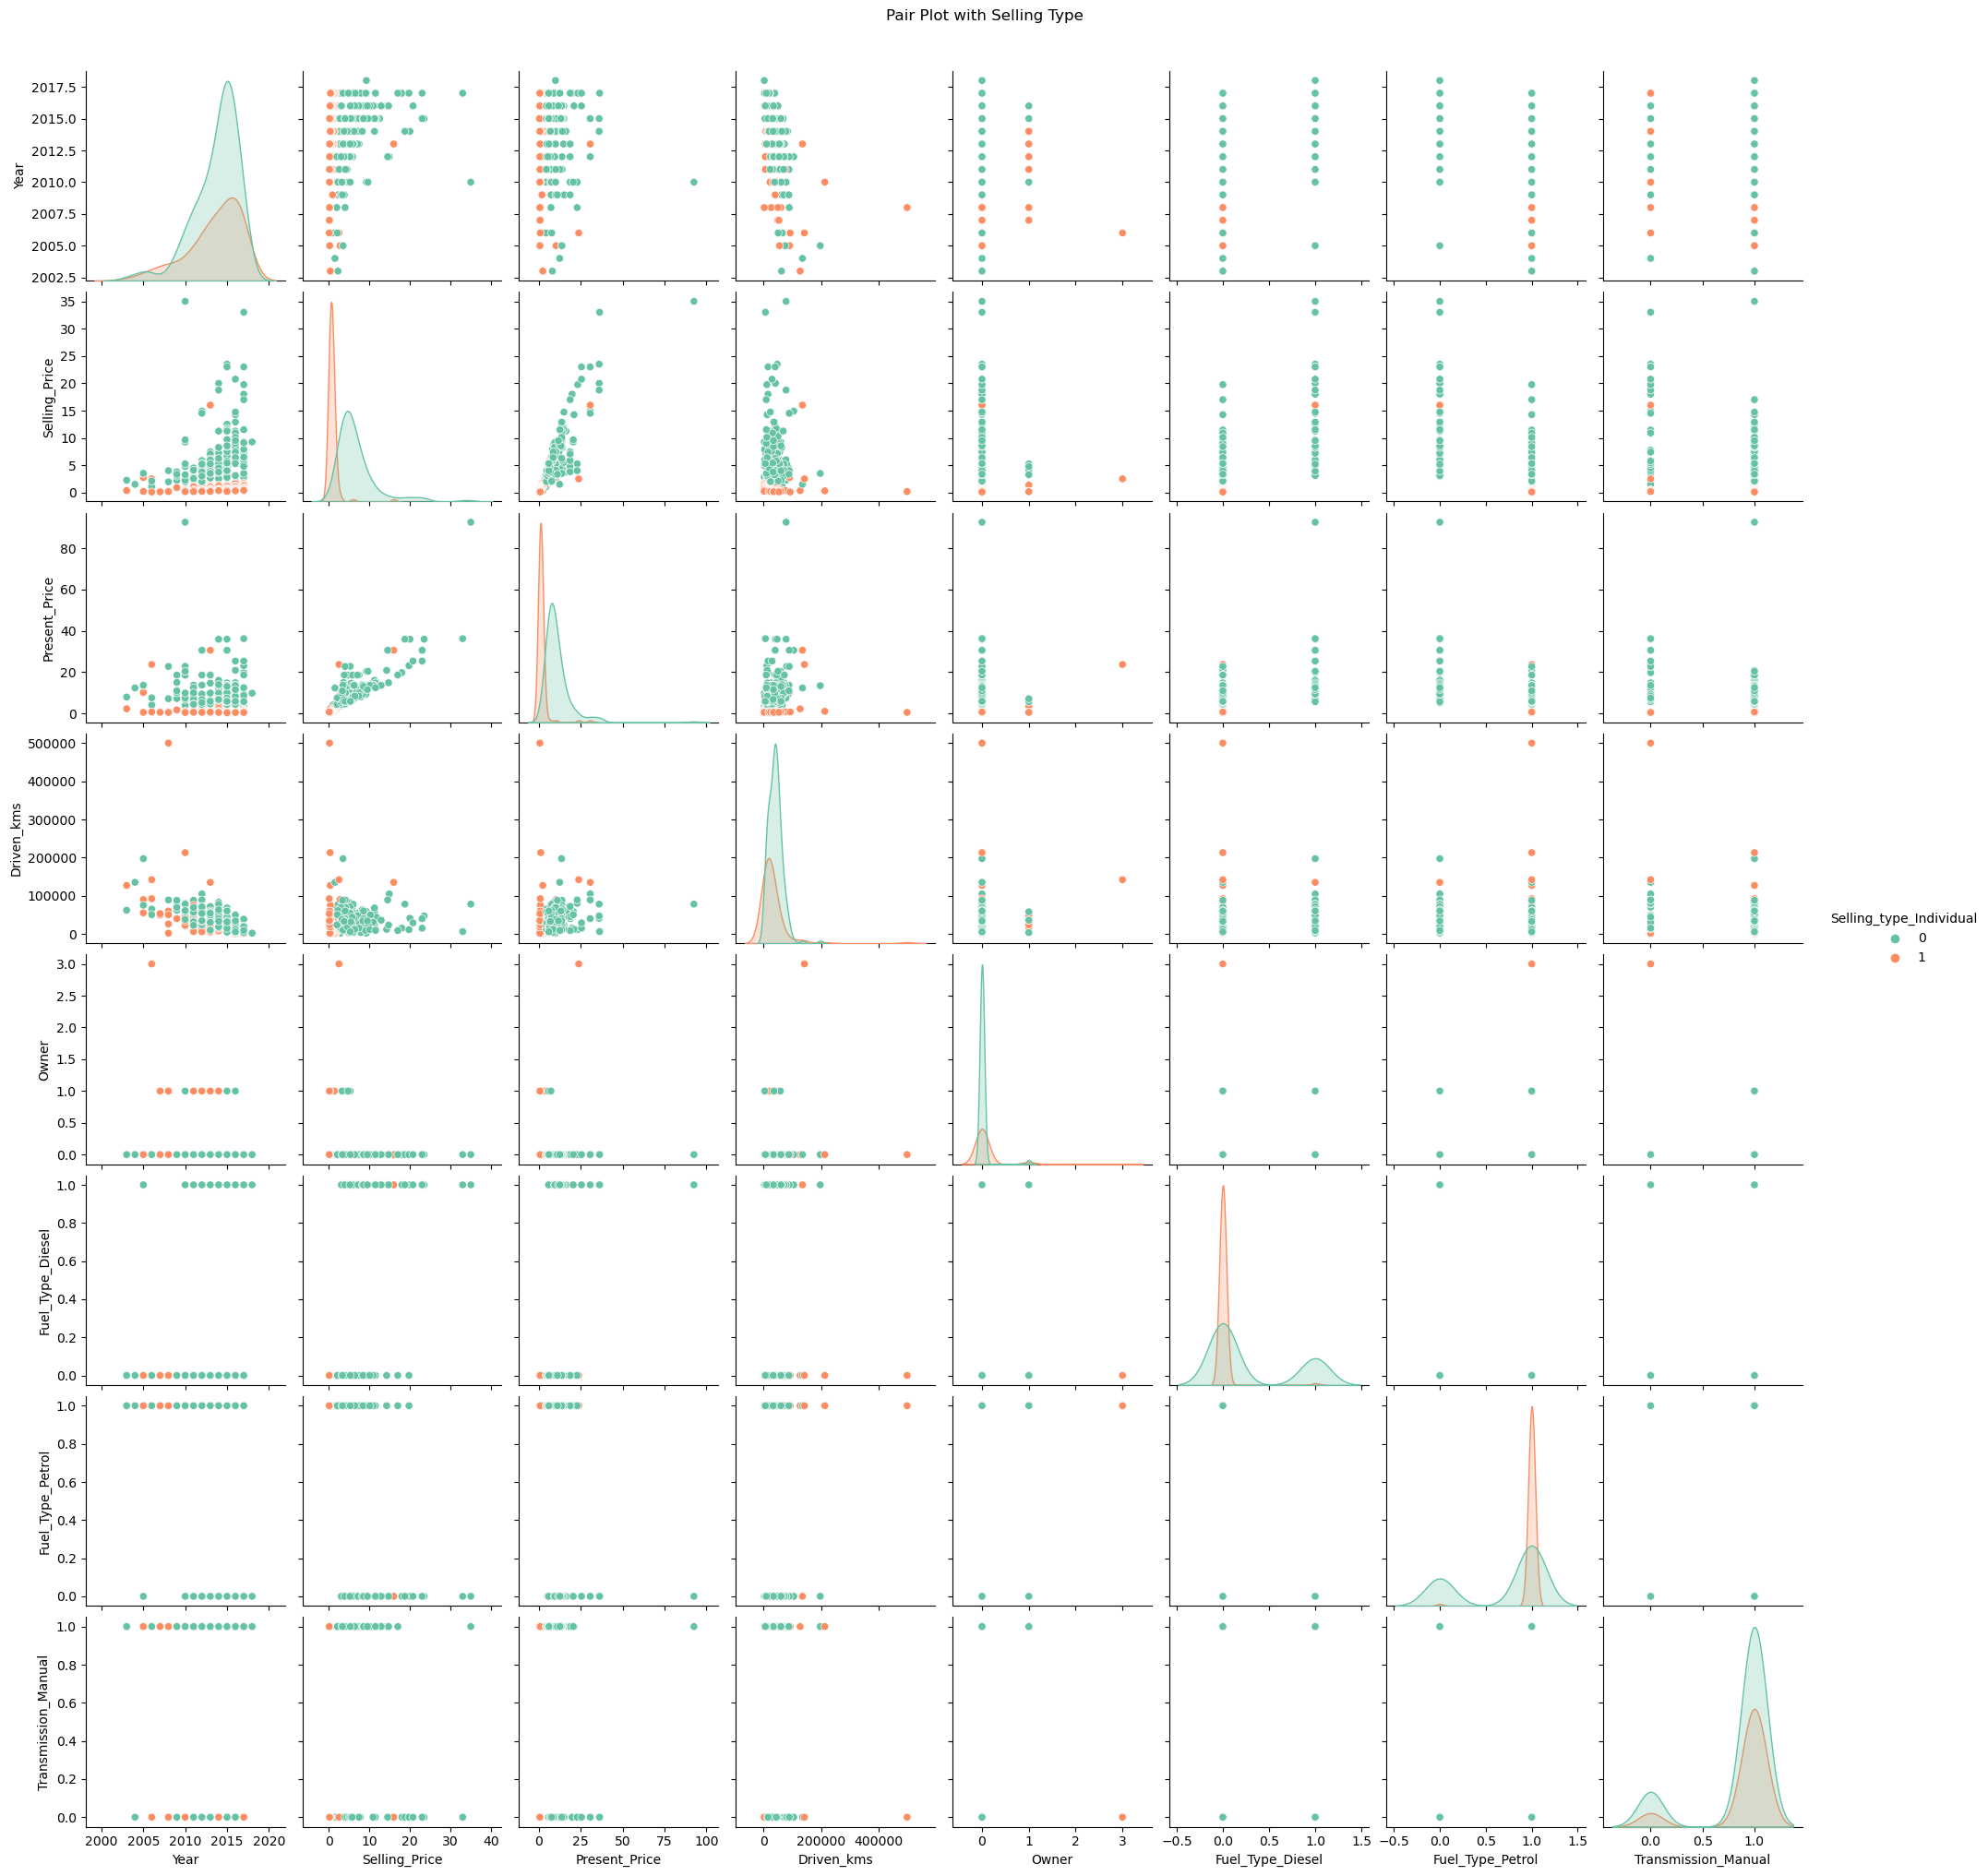

In [32]:
# Pair plot with hue for categorical features
sns.pairplot(data, hue='Selling_type_Individual', palette='Set2')
plt.suptitle('Pair Plot with Selling Type', y=1.02)
plt.show()


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> model traning </div>l

In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (240, 8)
X_test shape: (61, 8)
y_train shape: (240,)
y_test shape: (61,)


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">linear regression model</div>l

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [35]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 1.2163740193336905
Mean Squared Error: 3.4813498305149513
R-squared: 0.8488707839191794


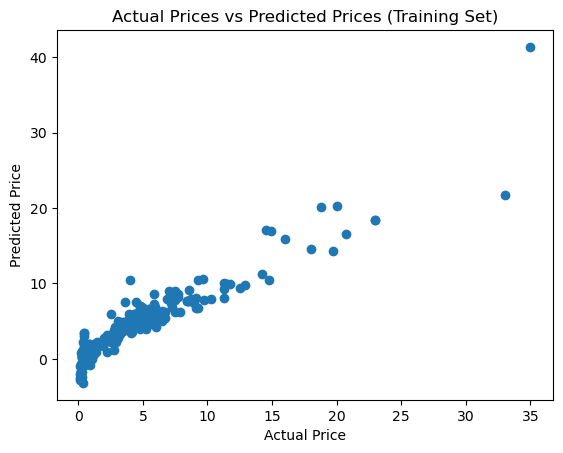

In [37]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Make predictions on the training set
training_data_prediction = model.predict(X_train)

# Scatter plot for actual vs predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Training Set)")
plt.show()


In [38]:
import pandas as pd

# Create a DataFrame with actual and predicted values
prediction_comparison = pd.DataFrame({'Actual_Price': y_train, 'Predicted_Price': training_data_prediction})

# Display the DataFrame
print(prediction_comparison.head())


     Actual_Price  Predicted_Price
184          0.25        -2.349284
132          0.75         1.956948
194          0.20        -1.576737
75           3.95         4.751913
111          1.15         1.807869


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">model improvement</div>l

In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the numerical features in the testing set
X_test_scaled = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_scaled = LinearRegression()

# Train the model with scaled features
model_scaled.fit(X_train_scaled, y_train)


LinearRegression()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing set with scaled features
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate the model
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Display the evaluation metrics for the scaled model
print("Mean Absolute Error (Scaled):", mae_scaled)
print("Mean Squared Error (Scaled):", mse_scaled)
print("R-squared (Scaled):", r2_scaled)


Mean Absolute Error (Scaled): 1.2163740193330426
Mean Squared Error (Scaled): 3.4813498305118604
R-squared (Scaled): 0.8488707839193136


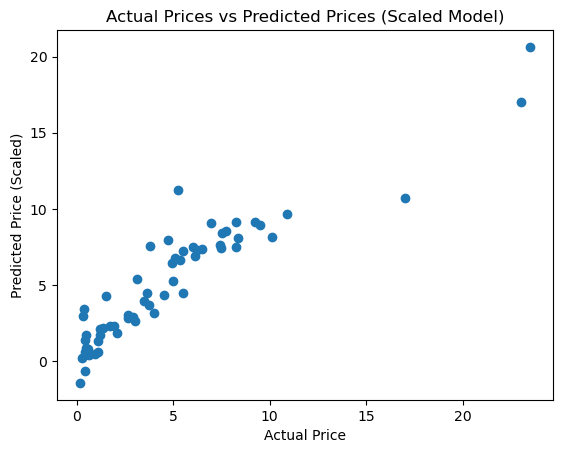

In [42]:
# Scatter plot for actual vs predicted prices with scaled features
plt.scatter(y_test, y_pred_scaled)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Scaled)")
plt.title("Actual Prices vs Predicted Prices (Scaled Model)")
plt.show()


In [43]:
# Create a DataFrame with actual and predicted values for the scaled model
prediction_comparison_scaled = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred_scaled})

# Display the DataFrame for the scaled model
print(prediction_comparison_scaled.head())


     Actual_Price  Predicted_Price
177          0.35         2.954337
289         10.11         8.177163
228          4.95         6.456123
198          0.15        -1.423372
60           6.95         9.088647


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">using polynomial features</div>l

In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed

# Transform the numerical features to polynomial features
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)


In [45]:
# Initialize the linear regression model with polynomial features
model_poly = LinearRegression()

# Train the model with polynomial features
model_poly.fit(X_train_poly, y_train)


LinearRegression()

In [46]:
# Make predictions on the testing set with polynomial features
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model with polynomial features
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Display the evaluation metrics for the model with polynomial features
print("Mean Absolute Error (Poly):", mae_poly)
print("Mean Squared Error (Poly):", mse_poly)
print("R-squared (Poly):", r2_poly)


Mean Absolute Error (Poly): 0.563009093237705
Mean Squared Error (Poly): 0.6801027792789898
R-squared (Poly): 0.9704759921034372


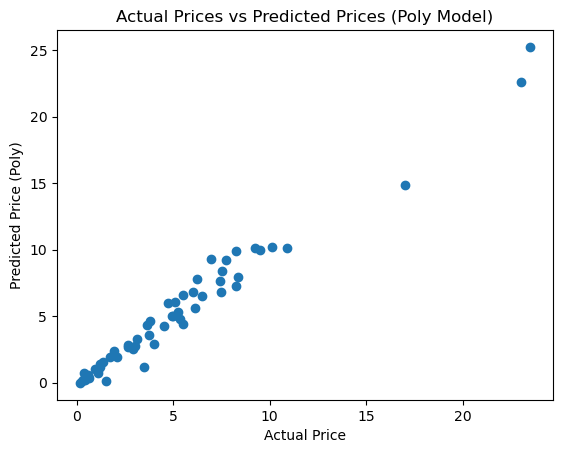

In [47]:
# Scatter plot for actual vs predicted prices with polynomial features
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Poly)")
plt.title("Actual Prices vs Predicted Prices (Poly Model)")
plt.show()


In [48]:
# Create a DataFrame with actual and predicted values for the model with polynomial features
prediction_comparison_poly = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred_poly})

# Display the DataFrame for the model with polynomial features
print(prediction_comparison_poly.head())


     Actual_Price  Predicted_Price
177          0.35         0.229736
289         10.11        10.195801
228          4.95         5.033203
198          0.15        -0.019043
60           6.95         9.312988


In [49]:
from sklearn.linear_model import Ridge

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter

# Train the model with polynomial features using Ridge regression
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_pred_ridge = ridge_model.predict(X_test_poly)

# Evaluate the Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the evaluation metrics for the Ridge model
print("Mean Absolute Error (Ridge):", mae_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("R-squared (Ridge):", r2_ridge)


Mean Absolute Error (Ridge): 0.5609378076011532
Mean Squared Error (Ridge): 0.6408554347826491
R-squared (Ridge): 0.9721797623924772


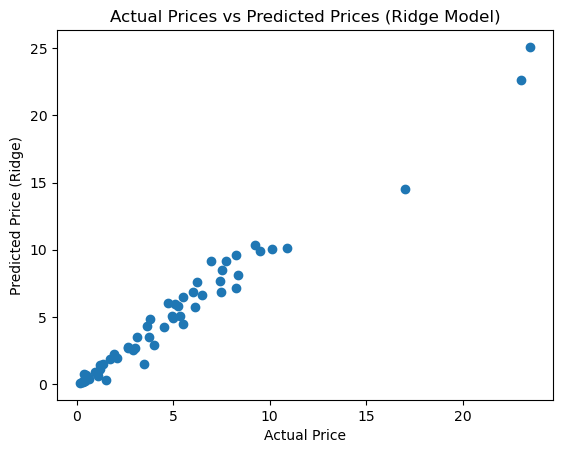

In [50]:
# Scatter plot for actual vs predicted prices with Ridge model
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Ridge)")
plt.title("Actual Prices vs Predicted Prices (Ridge Model)")
plt.show()


In [51]:
# Create a DataFrame with actual and predicted values for the Ridge model
prediction_comparison_ridge = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred_ridge})

# Display the DataFrame for the Ridge model
print(prediction_comparison_ridge.head())


     Actual_Price  Predicted_Price
177          0.35         0.137639
289         10.11        10.041091
228          4.95         5.093063
198          0.15         0.097905
60           6.95         9.148748
